In [76]:
#Importing needed libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import datetime

In [77]:
#extract

# import extract_performance as performance
# import extract_student_teacher as student_teacher
# import extract_community as community

def fx_extract_performance(v_year):
    if v_year == 2016:
        df_performance = pd.read_csv('result_campus.csv')
        rename_dict = {'Campus': 'campus_id' , 'Year' : 'year' , 'Student_count' : 'student_count' , 'Pass_count' : 'pass_count'}
        df_performance.rename(columns=rename_dict, inplace=True)
        return df_performance

def fx_extract_student_teacher(v_year):
    if v_year == 2016:
        df_student_teacher = pd.read_csv('CAMPPROF_2016.csv')
        rename_dict = {"CPSTTOSA": "avg_salary", "CAMPUS": "campus_id","CPETECOC": "ed_count"}
        df_student_teacher.rename(columns=rename_dict, inplace=True)
        df_student_teacher['year'] = [v_year for i,r in df_student_teacher.iterrows() ]
        df_student_teacher =df_student_teacher.loc[:,['campus_id',  'ed_count', 'avg_salary', 'year']]
        return df_student_teacher
    if v_year == 2017:
        df_student_teacher = pd.read_csv('CAMPPROF_2017.csv')
        rename_dict = {"CPSTTOSA": "avg_salary", "CAMPUS": "campus_id","CPETECOC": "ed_count"}
        df_student_teacher.rename(columns=rename_dict, inplace=True)
        df_student_teacher['year'] = [v_year for i,r in df_student_teacher.iterrows() ]
        df_student_teacher =df_student_teacher.loc[:,['campus_id',  'ed_count', 'avg_salary', 'year']]
        return df_student_teacher

def fx_extract_community():
    df_community = pd.read_csv('Community.csv')
    return df_community



In [78]:
# #transform

# import transform_campus_merge as campus_merge
# import transform_community_merge as community_merge
def transform_merge(df_performance,df_student_teacher,df_community):
    df_community_performance = pd.merge(df_community,df_performance, on =['campus_id'], how='inner')
    df_community_complete = pd.merge(df_community_performance,df_student_teacher,on =['campus_id','year'], how='inner')
    df_community_complete['pct_pass'] = [(100*r['pass_count']/r['student_count']) for i, r in df_community_complete.iterrows()]
    df_community_complete['pct_ed'] = [(100*r['ed_count']/r['student_count']) for i, r in df_community_complete.iterrows()]
    df_community_complete = df_community_complete.reset_index()
    return df_community_complete
def fx_economical_disadvantage(df_performance,df_student_teacher,df_community):
    df_community_complete= transform_merge(df_performance,df_student_teacher,df_community)
    df_return = df_community_complete.loc[:,['campus_name',  'pct_ed', 'pct_pass' , 'student_count' , 'community', 'year']]
    df_return.drop_duplicates()
    df_return = df_return.dropna(how='any')
    return df_return
def fx_salary(df_performance,df_student_teacher,df_community):
    df_community_complete= transform_merge(df_performance,df_student_teacher,df_community)
    df_return =df_community_complete.loc[:,['campus_name',  'avg_salary', 'pct_pass' , 'student_count' , 'community', 'year']]
    df_return.drop_duplicates()
    df_return = df_return.dropna(how='any')
    return df_return

def fx_community(df_performance,df_community):
    df_community_performance = pd.merge(df_community,df_performance,on = 'campus_id', how='inner')
    df_community_performance['pct_pass'] = [(100*r['pass_count']/r['student_count']) for i, r in df_community_performance.iterrows()]
    unique_community_type = pd.Series(df_community_performance["community"]).unique()
    df_community = pd.DataFrame(unique_community_type,columns=['community'])
    df_community['median_pass'] = [df_community_performance.loc[(df_community_performance['community']==x) , 'pct_pass'].median()  for x in df_community["community"]]
    df_community.drop_duplicates()
    df_community = df_community.dropna(how='any')
    return df_community


In [79]:
#extract
v_interested_year = 2016

df_performance = fx_extract_performance(v_interested_year)
df_student_teacher = fx_extract_student_teacher(v_interested_year)
df_community = fx_extract_community()


#transform

DataFrame1 = fx_economical_disadvantage(df_performance,df_student_teacher,df_community)

DataFrame2 = fx_salary(df_performance,df_student_teacher,df_community)

DataFrame3 = fx_community(df_performance,df_community)



# import all_plots as v_plot
#
# # plotting call
#
# legend_dict = {'legend', 'xxx', 'x_name' = 'eeeee', 'year': v_interested_year}
# DataFrameA = DataFrame1.loc[:, ['pct_economical_disadvantage', 'pct_pass', 'total_students', 'community']]
# rename_dict = {'pct_economical_disadvantage': 'x_data', 'pct_pass': 'y_data', 'total_students': 'bubble_size',
#                'community': 'color_category'}
# DataFrameA = DataFrameA.rename(columns=rename_dict, inplace=True)
# fx_scatter_plot(DataFrameA, legend_dict)
#
# legend_dict = {'legend', 'yyyy', 'x_name' = 'eeee', 'year': v_interested_year}
# DataFrameA = DataFrame2.loc[:, ['average_salary', 'pct_pass', 'total_students', 'community']]
# rename_dict = {'average_salary': 'x_data', 'pct_pass': 'y_data', 'total_students': 'bubble_size',
#                'community': 'color_category'}
# DataFrameA = DataFrameA.rename(columns=rename_dict, inplace=True)
# fx_scatter_plot(DataFrameA, legend_dict)
#
# legend_dict = {'legend', 'yyyy', 'x_name' = 'eeee', 'year': v_interested_year}
# DataFrameB = DataFrame3.loc[:, ['community', 'pct_pass']]
# rename_dict = {'community': 'x_data', 'pct_pass': 'y_data'}
# DataFrameB = DataFrameB.rename(columns=rename_dict, inplace=True)
# v_plot.fx_bar_plot(DataFrameB, legend_dict)

#DataFrame1['campus_name'].count()
#before 7761
#DataFrame1.head()

#x = transform_merge(df_performance,df_student_teacher,df_community)
#df_student_teacher = df_student_teacher.dropna(how='any')
#df_student_teacher.head()

In [88]:
# plot function 
def fx_bar_plot(DataFrameB, legend_dict):
    
    x = DataFrameB['x_data']
    y = DataFrameB['y_data']
    width = .5  # the width of the bars
    plt.bar(x, y, width, color='SkyBlue')
    plt.title = (legend_dict['title'])
    plt.ylabel(legend_dict['ylabel'])
    plt.ylim(65, 85)
    #plt.xlabel('Regions')
    plt.xticks(rotation='vertical')
    plt.savefig(legend_dict['figname'])
    plt.show()

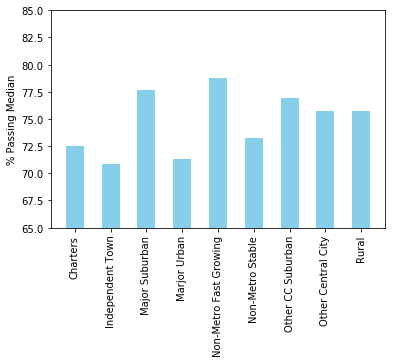

In [89]:
# bar plot call 
legend_dict = {'title' : str(v_interested_year) + 'Passing Pct vs Community Type',
               'ylabel' : '% Passing Median',
               'figname' : str(v_interested_year) +'passing_vs_community'
              }
DataFrameB =DataFrame3.loc[:,['community','median_pass']]
rename_dict = {'community': 'x_data', 'median_pass': 'y_data'}
DataFrameB.rename(columns=rename_dict, inplace=True)
fx_bar_plot(DataFrameB, legend_dict)





